# Fish Weight Prediction 🐟

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("FishData.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


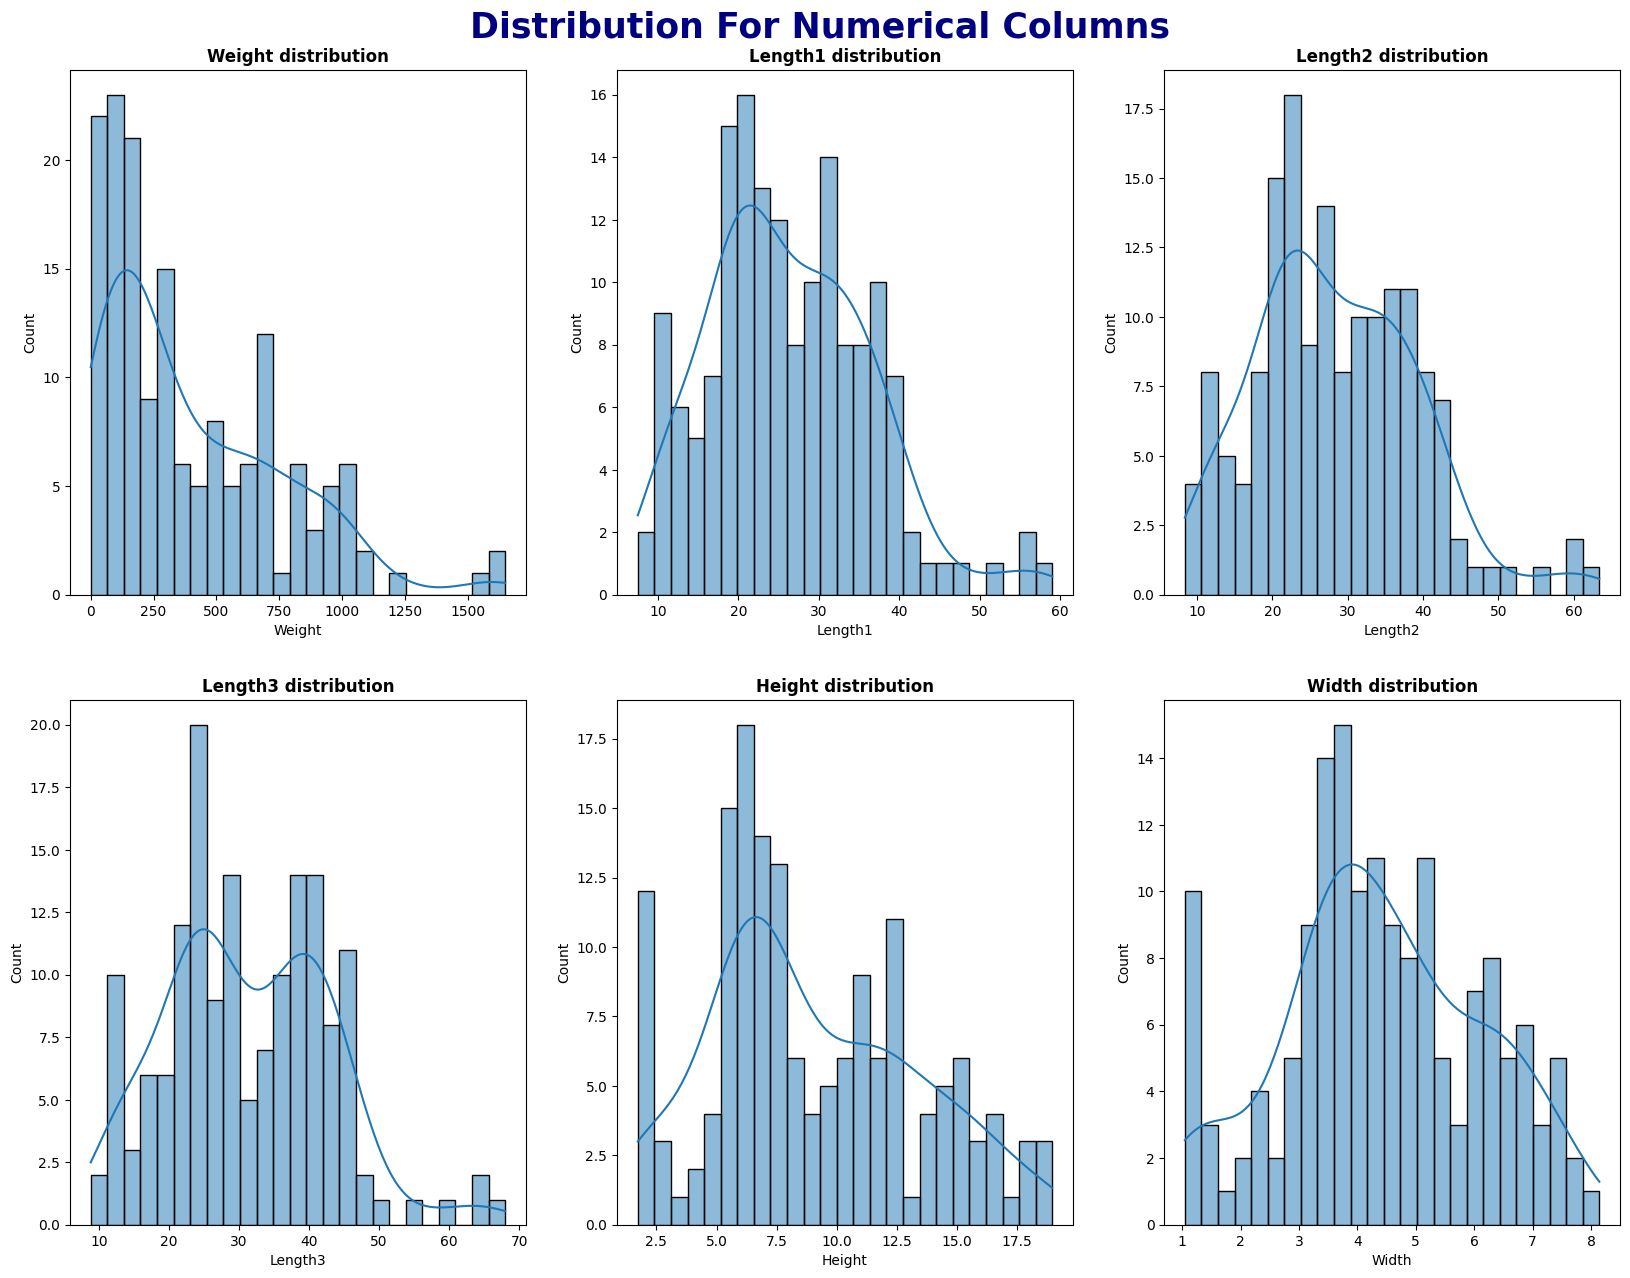

In [7]:
# Numerical columns distribution
numerical_columns = df.select_dtypes(include="number").columns.to_list()
plt.figure(figsize=(20, 15))

# Looping through each numerical column for plotting
for idx, column in enumerate(numerical_columns):
    # Creating subplots within the grid
    plt.subplot(2, 3, idx+1)
    sb.histplot(data=df, x=column, bins=25, kde=True)
    plt.title(f"{column} distribution", weight="bold")
    
plt.suptitle("Distribution for Numerical Columns".title(), weight="bold", fontsize=25, x=0.5, y=0.92, color='navy')
plt.show()

In [8]:
# Detect outliers

from datasist.structdata import detect_outliers

idx = detect_outliers(
    data=df, 
    n=0, #number of allowed outliers in the columns
    features=['Weight', 'Length1', 'Length2', 'Length3']
)
df.iloc[idx]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [9]:
# Describing non categorical columns

df.describe(exclude="number")

,Species
count,159
unique,7
top,Perch
freq,56


In [10]:
# Obtaining normalized value counts of the Species column 

df["Species"].value_counts(normalize=True).to_frame()

,proportion
Species,
Perch,0.352201
Bream,0.220126
Roach,0.125786
Pike,0.106918
Smelt,0.088050
Parkki,0.069182
Whitefish,0.037736


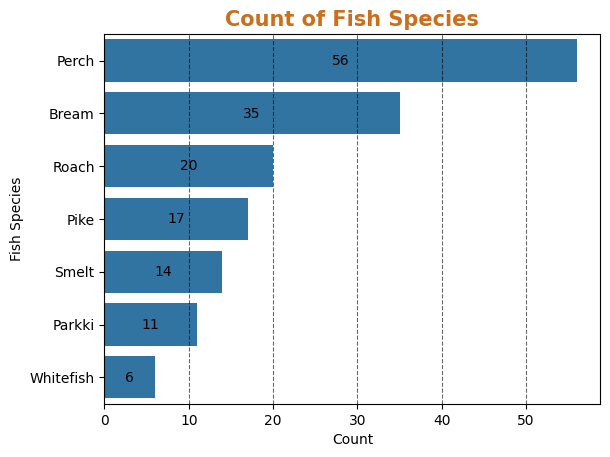

In [11]:
# Count plot for the Species column
ax = sb.countplot(data=df, y="Species", order=df["Species"].value_counts().index)

for container in ax.containers:
    ax.bar_label(container, label_type="center", color="k")
    
plt.title("Count of Fish Species", fontsize=15, weight="bold", color="#CA6F1E")
plt.xlabel("Count")
plt.ylabel("Fish Species")
plt.grid(axis="x", linestyle="--", alpha=0.6, c="k")

plt.show()

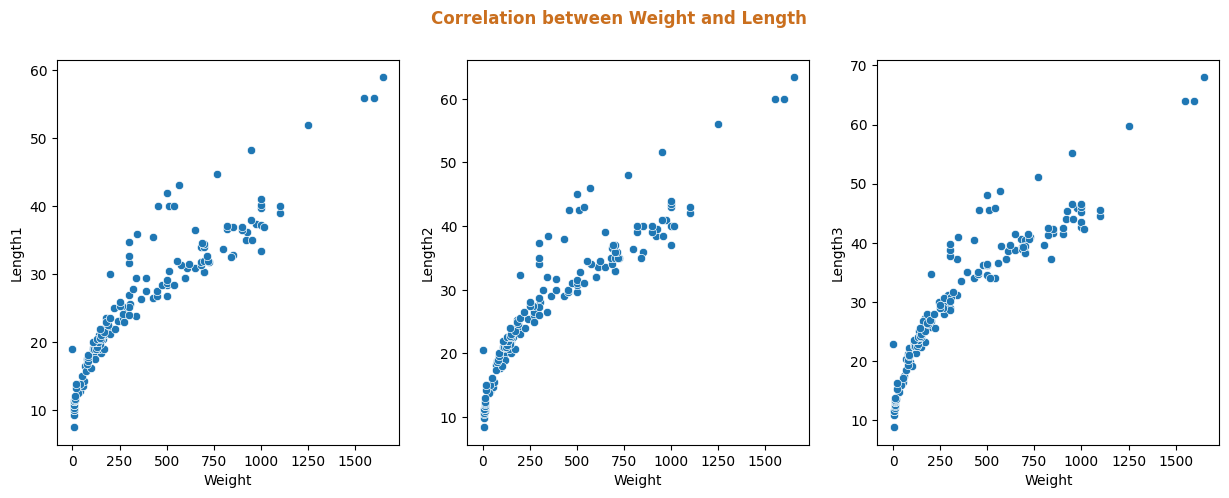

In [12]:
# Correlation between the weight of the fish and its length

condition = df.columns.str.contains("Length")
all_length = df.columns[condition].tolist()
plt.figure(figsize=(15,5))

for idx, column in enumerate(all_length):
    plt.subplot(1, 3, idx+1)
    sb.scatterplot(data=df, x="Weight", y=column)
plt.suptitle("Correlation between Weight and Length", weight="bold", color="#CA6F1E")
plt.show()

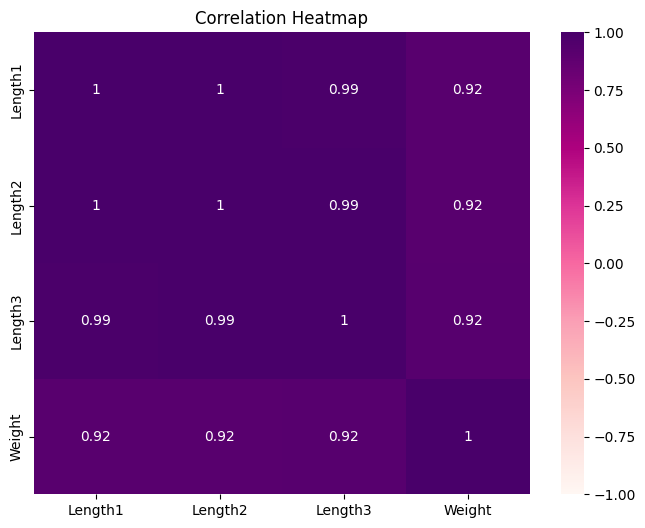

In [13]:
# Heatmap of correlation between height and weight

subset_columns = ["Length1", "Length2", "Length3", "Weight"]
corr_matrix = df[subset_columns].corr()

plt.figure(figsize=(8, 6))
sb.heatmap(corr_matrix, annot=True, cmap='RdPu',vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

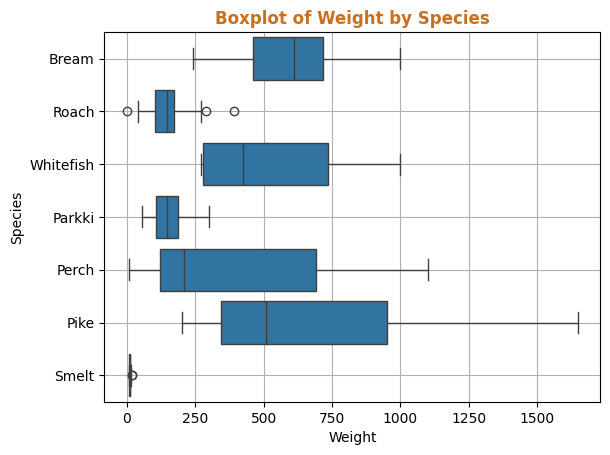

In [14]:
# Boxplot of weight of the fish differ based on its species

sb.boxplot(data=df, x="Weight", y="Species")
plt.title('Boxplot of Weight by Species', weight="bold", color="#CA6F1E")
plt.xlabel('Weight')
plt.ylabel('Species')
plt.grid(True)
plt.show()

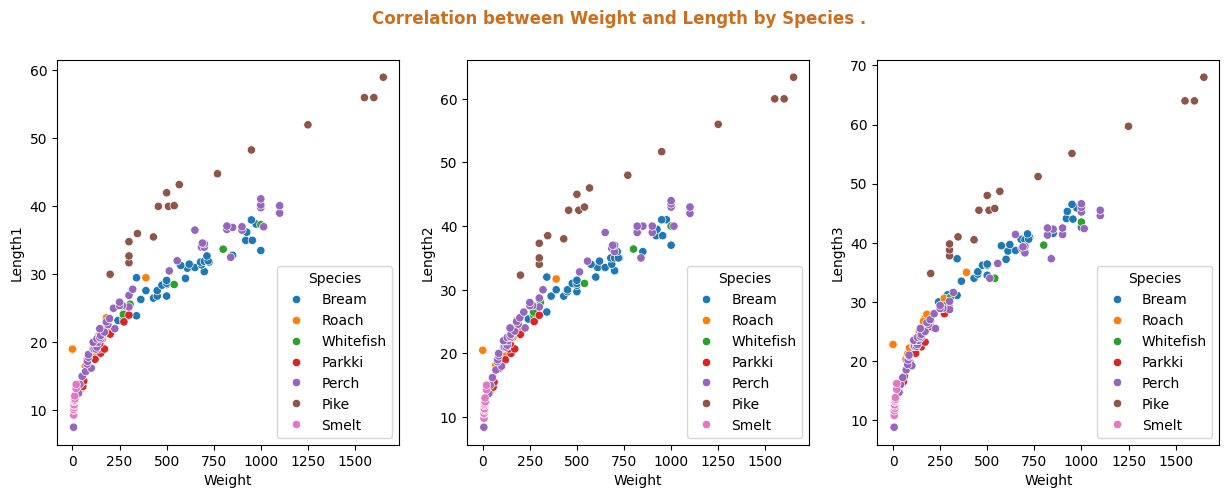

In [15]:
# Scatterplot of length and weight of the fish across different species

plt.figure(figsize=(15,5))
for idx, column in enumerate(all_length):
    plt.subplot(1, 3, idx+1)
    sb.scatterplot(data=df, x="Weight", y=column, hue="Species")
    
plt.suptitle("Correlation between Weight and Length by Species .", weight="bold", color="#CA6F1E")
plt.show()

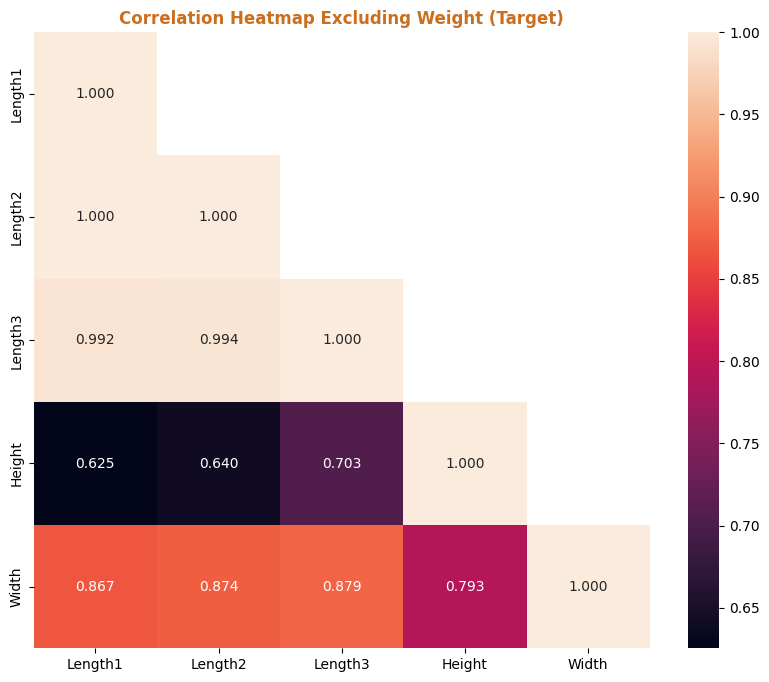

In [16]:
# Correlation heatmap excluding the Weight column (target)

multi_corr = df.drop("Weight", axis=1).corr(numeric_only=True)
mask = np.triu(np.ones_like(multi_corr), k=1)
plt.figure(figsize=(10, 8))

sb.heatmap( multi_corr, annot=True, mask=mask, square=True, fmt="0.3f")
plt.title("Correlation Heatmap Excluding Weight (Target)", weight="bold", color="#CA6F1E")
plt.show()

In [17]:
df.drop(columns=["Length2", "Length3"], inplace=True)

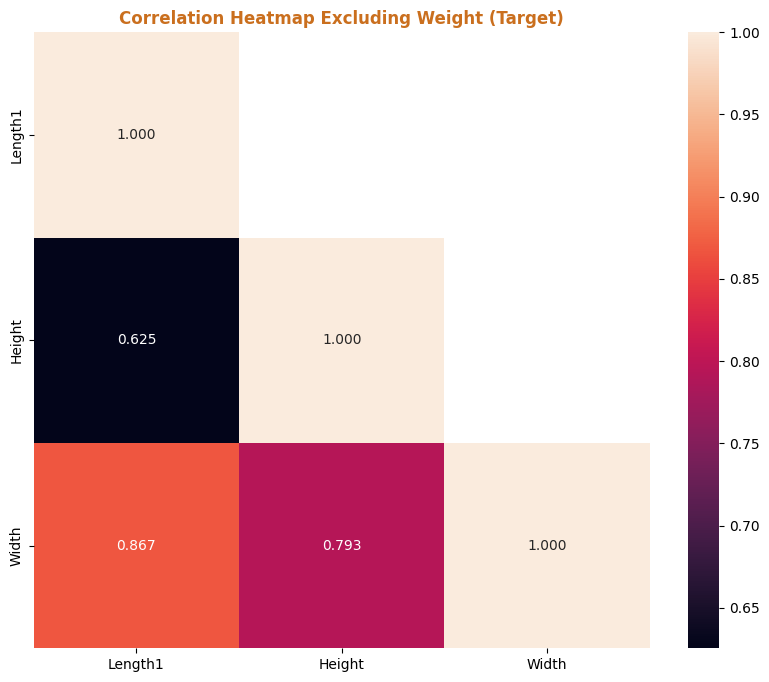

In [18]:
# Correlation heatmap after dropping the highly correlated columns

multi_corr = df.drop("Weight", axis=1).corr(numeric_only=True)
mask = np.triu(np.ones_like(multi_corr), k=1)
plt.figure(figsize=(10, 8))

sb.heatmap( multi_corr, annot=True, mask=mask, square=True, fmt="0.3f")
plt.title("Correlation Heatmap Excluding Weight (Target)", weight="bold", color="#CA6F1E")
plt.show()

# Preprocessing and Regression

In [19]:
num_cols = df.select_dtypes(include="number").columns.to_list()
categ_cols = df.select_dtypes(exclude="number").columns.to_list()
print(f"Numerical Columns: {num_cols}")
print(f"Categorical Columns: {categ_cols}")

Numerical Columns: ['Weight', 'Length1', 'Height', 'Width']
Categorical Columns: ['Species']


In [20]:
classes = dict()
le = LabelEncoder()
for col in categ_cols:
    df[col]= le.fit_transform(df[col])
    classes[col] = le.classes_

In [21]:
target = "Weight"
X = df.drop(target, axis=1)
y = df[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = reg.predict(X_test)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.8940949982852335, 15063.851916267118, 99.99647088535711)

In [26]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

In [27]:
r2_score(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_ridge)

(0.8940828208949735, 15065.584019573234, 100.0143547488827)

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)
x_poly.shape

(159, 15)

In [30]:
reg_poly = LinearRegression()
reg_poly.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = reg_poly.predict(x_test)

In [32]:
r2_score(y_test, y_pred)

0.9764892059440736

In [33]:
# Function to check different degrees
def test_polynomial_regression(X, y):
    results = {}
    for degree in range(1,6):
        poly = PolynomialFeatures(degree=degree)
        x_poly = poly.fit_transform(X)
        
        x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

        reg_poly = LinearRegression()
        reg_poly.fit(x_train, y_train)

        y_pred = reg_poly.predict(x_test)

        r2 = r2_score(y_test, y_pred)
        results[f'Degree {degree}'] = r2

    return results

In [34]:
results = test_polynomial_regression(X, y)
print("R2 scores for different polynomial degrees:")
for degree, r2 in results.items():
    print(f"{degree}: {r2}")

R2 scores for different polynomial degrees:
Degree 1: 0.8940949982852339
Degree 2: 0.9764892059440736
Degree 3: 0.9764318088466614
Degree 4: 0.4071913276159247
Degree 5: -104874779.1424315
